In [ ]:
import pandas as pd

In [3]:
hr_df = pd.read_csv('./data/HR_comma_sep.csv')

In [4]:
hr_df.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [5]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Satisfaction Level Vs Left

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn

In [9]:
left = hr_df[hr_df.left == 1]
not_left = hr_df[hr_df.left == 0]

In [10]:
left.shape

(3571, 10)

In [11]:
not_left.shape

(11428, 10)

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


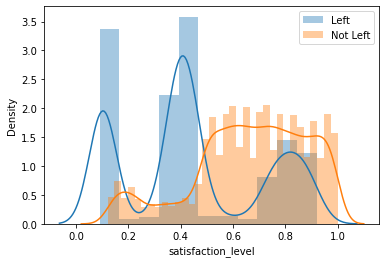

In [12]:
sn.distplot( left['satisfaction_level'], label = 'Left')
sn.distplot( not_left['satisfaction_level'], label = 'Not Left')
plt.legend();

### Last Evaluation Vs Left

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


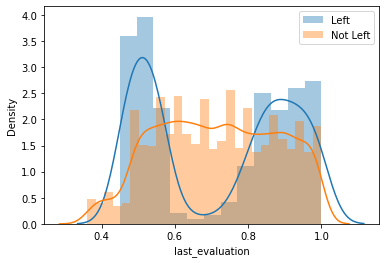

In [13]:
sn.distplot( left['last_evaluation'], label = 'Left')
sn.distplot( not_left['last_evaluation'], label = 'Not Left')
plt.legend();

In [14]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

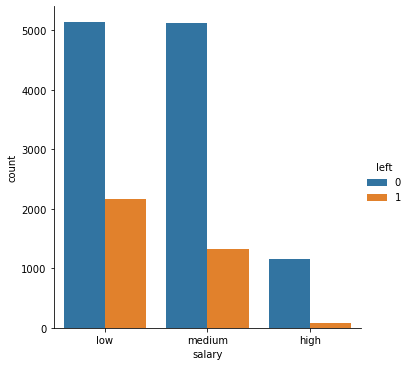

In [15]:
sn.catplot( data = hr_df,
            x = 'salary',
            hue = 'left',
            kind = 'count' );

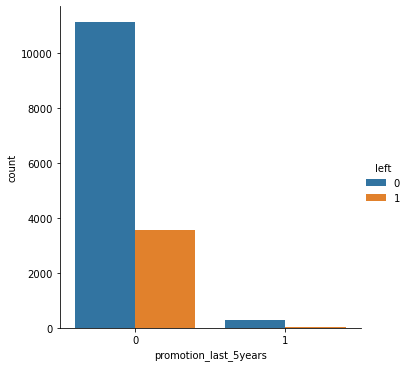

In [16]:
sn.catplot( data = hr_df,
            x = 'promotion_last_5years',
            hue = 'left',
            kind = 'count' );

### Time Spend Company Vs Left

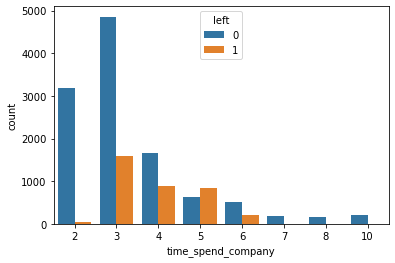

In [17]:
sn.countplot( data = hr_df,
              x = 'time_spend_company',
              hue = 'left' );

In [18]:
pd.crosstab( hr_df.time_spend_company, 
             hr_df.left,
             normalize = 'index')

left,0,1
time_spend_company,,
2,0.983662,0.016338
3,0.753841,0.246159
4,0.651936,0.348064
5,0.434487,0.565513
6,0.708914,0.291086
7,1.000000,0.000000
8,1.000000,0.000000
10,1.000000,0.000000


In [19]:
hr_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Encoding Categorical Features

- OHE - One Hot Encoding 
- Dummy Variable Creation

In [21]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['dept', 'salary'] )

In [22]:
hr_encoded_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
hr_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept_IT                14999 non-null  uint8  
 9   dept_RandD             14999 non-null  uint8  
 10  dept_accounting        14999 non-null  uint8  
 11  dept_hr                14999 non-null  uint8  
 12  dept_management        14999 non-null  uint8  
 13  dept_marketing         14999 non-null  uint8  
 14  dept_product_mng       14999 non-null  uint8  
 15  de

### Setting X and Y Variables

In [25]:
hr_encoded_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept_IT', 'dept_RandD', 'dept_accounting',
       'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng',
       'dept_sales', 'dept_support', 'dept_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [26]:
X_features = list(hr_encoded_df.columns)

In [27]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [28]:
X_features.remove('left')

In [29]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [30]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

In [31]:
X[0:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [32]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [35]:
X_train.shape

(11999, 20)

In [36]:
X_test.shape

(3000, 20)

### Build a Model: V1

Logistic Regression Model - Sigmoid function

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [39]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

In [40]:
logreg_v1.intercept_

array([-0.42690117])

In [41]:
logreg_v1.coef_

array([[-3.96557128,  0.74072348, -0.29613324,  0.00435045,  0.26674253,
        -1.5154192 , -1.30588715, -0.09970079, -0.48811429,  0.13467567,
         0.3260412 , -0.42426704,  0.03011667, -0.0815001 ,  0.03190183,
         0.06462707,  0.12203499, -1.1936305 ,  0.6767727 ,  0.132673  ]])

In [42]:
dict( zip( X_features, logreg_v1.coef_[0] ) )

{'satisfaction_level': -3.9655712815527084,
 'last_evaluation': 0.7407234814976362,
 'number_project': -0.2961332441196489,
 'average_montly_hours': 0.00435044740042506,
 'time_spend_company': 0.2667425292595114,
 'Work_accident': -1.5154192044847938,
 'promotion_last_5years': -1.305887154121786,
 'dept_IT': -0.09970078746383504,
 'dept_RandD': -0.48811429167954795,
 'dept_accounting': 0.13467566722425525,
 'dept_hr': 0.3260411959017137,
 'dept_management': -0.42426703598903076,
 'dept_marketing': 0.030116665821913396,
 'dept_product_mng': -0.08150010281670632,
 'dept_sales': 0.03190182807807275,
 'dept_support': 0.06462707259608913,
 'dept_technical': 0.12203498556302876,
 'salary_high': -1.193630497830418,
 'salary_low': 0.676772695549903,
 'salary_medium': 0.13267299951528455}

### Predict on Test Set

- p(y) >= 0.5,  y = 1
- p(y) < 0.5, y = 0

In [43]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [44]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

In [45]:
y_logreg_v1[0:10]

,actual,predicted
10155,0,0
11688,0,0
12598,1,0
12192,1,0
8678,0,1
8217,0,0
4670,0,0
12086,1,1
5235,0,0
4189,0,0


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_logreg_v1.actual, y_logreg_v1.predicted)

0.786

### Evaluating the model

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm_v1 = confusion_matrix( y_logreg_v1.actual, 
                          y_logreg_v1.predicted,
                          [1,0] )

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [50]:
cm_v1

array([[ 255,  495],
       [ 147, 2103]])

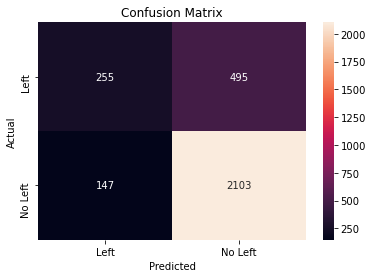

In [51]:
sn.heatmap( cm_v1, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [52]:
(256/(256+497)) # Recall

0.3399734395750332

In [53]:
(256/(256+147)) # Precision

0.6352357320099256

In [54]:
from sklearn.metrics import classification_report

In [55]:
print( classification_report( y_logreg_v1.actual,
                              y_logreg_v1.predicted ) )

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2250
           1       0.63      0.34      0.44       750

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.76      3000



### KNN Model

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn_v1 = KNeighborsClassifier(n_neighbors = 25)

In [97]:
knn_v1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [98]:
knn_pred = knn_v1.predict(X_test)

In [99]:
cm_knn = confusion_matrix(y_test, knn_pred, [1,0])

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


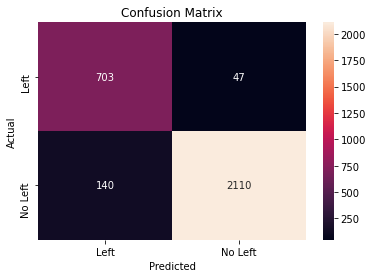

In [100]:
sn.heatmap( cm_knn, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [102]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2250
           1       0.83      0.94      0.88       750

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.92      3000
weighted avg       0.94      0.94      0.94      3000



In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
knn_v1 = KNeighborsClassifier()

In [105]:
params = { "n_neighbors": [10, 15, 20, 25, 30],
           "weights": ['uniform', 'distance']}

In [106]:
knn_grid = GridSearchCV(knn_v1,
                        param_grid=params,
                        cv=10,
                        scoring='recall')

In [107]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [108]:
knn_grid.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [109]:
knn_grid.best_score_

0.9695198356013333

In [112]:
best_knn_v2 = knn_grid.best_estimator_

In [110]:
pd.DataFrame(knn_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016892,0.004158,0.060594,0.011483,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.907801,0.925532,0.904255,0.914894,0.925532,0.921986,0.900709,0.904255,0.879859,0.921986,0.910681,0.013619,10
1,0.015096,0.001118,0.025798,0.009174,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.968085,0.964539,0.960993,0.960993,0.971631,0.975177,0.971631,0.957447,0.946996,0.982270,0.965976,0.009504,5
2,0.015727,0.002138,0.061126,0.006342,15,uniform,"{'n_neighbors': 15, 'weights': 'uniform'}",0.911348,0.925532,0.918440,0.914894,0.936170,0.925532,0.911348,0.921986,0.886926,0.936170,0.918834,0.013589,6
3,0.016119,0.003607,0.026771,0.001777,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",0.968085,0.964539,0.957447,0.953901,0.971631,0.978723,0.971631,0.971631,0.946996,0.978723,0.966331,0.010025,4
4,0.018757,0.009048,0.070592,0.034094,20,uniform,"{'n_neighbors': 20, 'weights': 'uniform'}",0.907801,0.921986,0.921986,0.914894,0.925532,0.914894,0.911348,0.911348,0.879859,0.936170,0.914582,0.014030,8
5,0.023463,0.013965,0.038493,0.029388,20,distance,"{'n_neighbors': 20, 'weights': 'distance'}",0.968085,0.964539,0.971631,0.953901,0.975177,0.975177,0.975177,0.964539,0.946996,0.982270,0.967749,0.010172,3
6,0.017850,0.010024,0.060916,0.005910,25,uniform,"{'n_neighbors': 25, 'weights': 'uniform'}",0.914894,0.921986,0.918440,0.921986,0.929078,0.921986,0.918440,0.914894,0.883392,0.939716,0.918481,0.013627,7
7,0.017433,0.008664,0.030816,0.006982,25,distance,"{'n_neighbors': 25, 'weights': 'distance'}",0.971631,0.964539,0.964539,0.964539,0.975177,0.978723,0.975177,0.964539,0.954064,0.982270,0.969520,0.008086,1
8,0.015751,0.001295,0.073101,0.024721,30,uniform,"{'n_neighbors': 30, 'weights': 'uniform'}",0.911348,0.914894,0.907801,0.918440,0.921986,0.921986,0.914894,0.911348,0.883392,0.929078,0.913517,0.011676,9
9,0.015946,0.001382,0.033997,0.004166,30,distance,"{'n_neighbors': 30, 'weights': 'distance'}",0.971631,0.960993,0.968085,0.968085,0.968085,0.978723,0.975177,0.960993,0.946996,0.982270,0.968104,0.009605,2


### Building a Decision Tree Model

In [ ]:
#!pip install pydotplus

In [ ]:
#import pydotplus

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
tree_v2 = DecisionTreeClassifier( max_depth = 5 )
### Max Depth is called hyperparameter

In [115]:
tree_v2.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=5)

In [116]:
y_tree_pred = tree_v2.predict( X_test )

In [117]:
cm_tree_v2 = confusion_matrix( y_test,
                               y_tree_pred,
                               [1,0] )

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


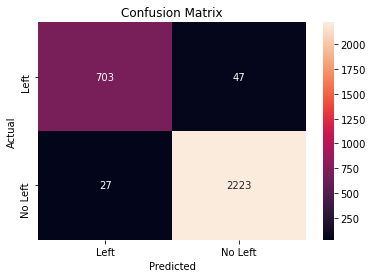

In [118]:
sn.heatmap( cm_tree_v2, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [119]:
print( classification_report( y_test,
                       y_tree_pred ) )

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2250
           1       0.96      0.94      0.95       750

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [120]:
features_df = pd.DataFrame( { "features": X_features,
                              "importance": tree_v2.feature_importances_ } )

In [121]:
features_df.sort_values("importance", ascending = False)

,features,importance
0,satisfaction_level,0.520572
4,time_spend_company,0.158379
1,last_evaluation,0.150904
2,number_project,0.102812
3,average_montly_hours,0.066148
15,dept_support,0.001089
16,dept_technical,0.000097
12,dept_marketing,0.000000
18,salary_low,0.000000
17,salary_high,0.000000


In [122]:
pred_prob = logreg_v1.predict_proba(X_test)

In [123]:
pred_prob[0:10]

array([[0.91298794, 0.08701206],
       [0.90357431, 0.09642569],
       [0.52133117, 0.47866883],
       [0.78145645, 0.21854355],
       [0.1879935 , 0.8120065 ],
       [0.98926657, 0.01073343],
       [0.97138504, 0.02861496],
       [0.36384851, 0.63615149],
       [0.98191714, 0.01808286],
       [0.95743803, 0.04256197]])

In [124]:
left_pred_prob = list(pred_prob[:,1])

In [125]:
pred_1 = list(map(lambda x: 1 if x >= 0.4 else 0, left_pred_prob))

In [126]:
cm_tree_v1 = confusion_matrix( y_test,
                               pred_1,
                               [1,0] )

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [127]:
cm_tree_v1

array([[ 402,  348],
       [ 228, 2022]])

### Visualizing Decision Tree

In [128]:
## Installing pydotplus
!pip install pydotplus

     |████████████████████████████████| 278 kB 1.8 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24567 sha256=30597f227c895ebab682b105c1d28d69c68469c0bac99fcccecdad5470098f5e
  Stored in directory: /Users/nagakiran/Library/Caches/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [129]:
from sklearn.tree import export_graphviz

export_graphviz( tree_v2,
                 out_file = 'tree.model',
                 feature_names = X_features,
                 class_names = ['No Left', 'Left'],
                 filled = True )

import pydotplus as pdot

tree_graph = pdot.graph_from_dot_file( 'tree.model' )

In [131]:
tree_graph.write_jpeg("tree.jpeg")

True

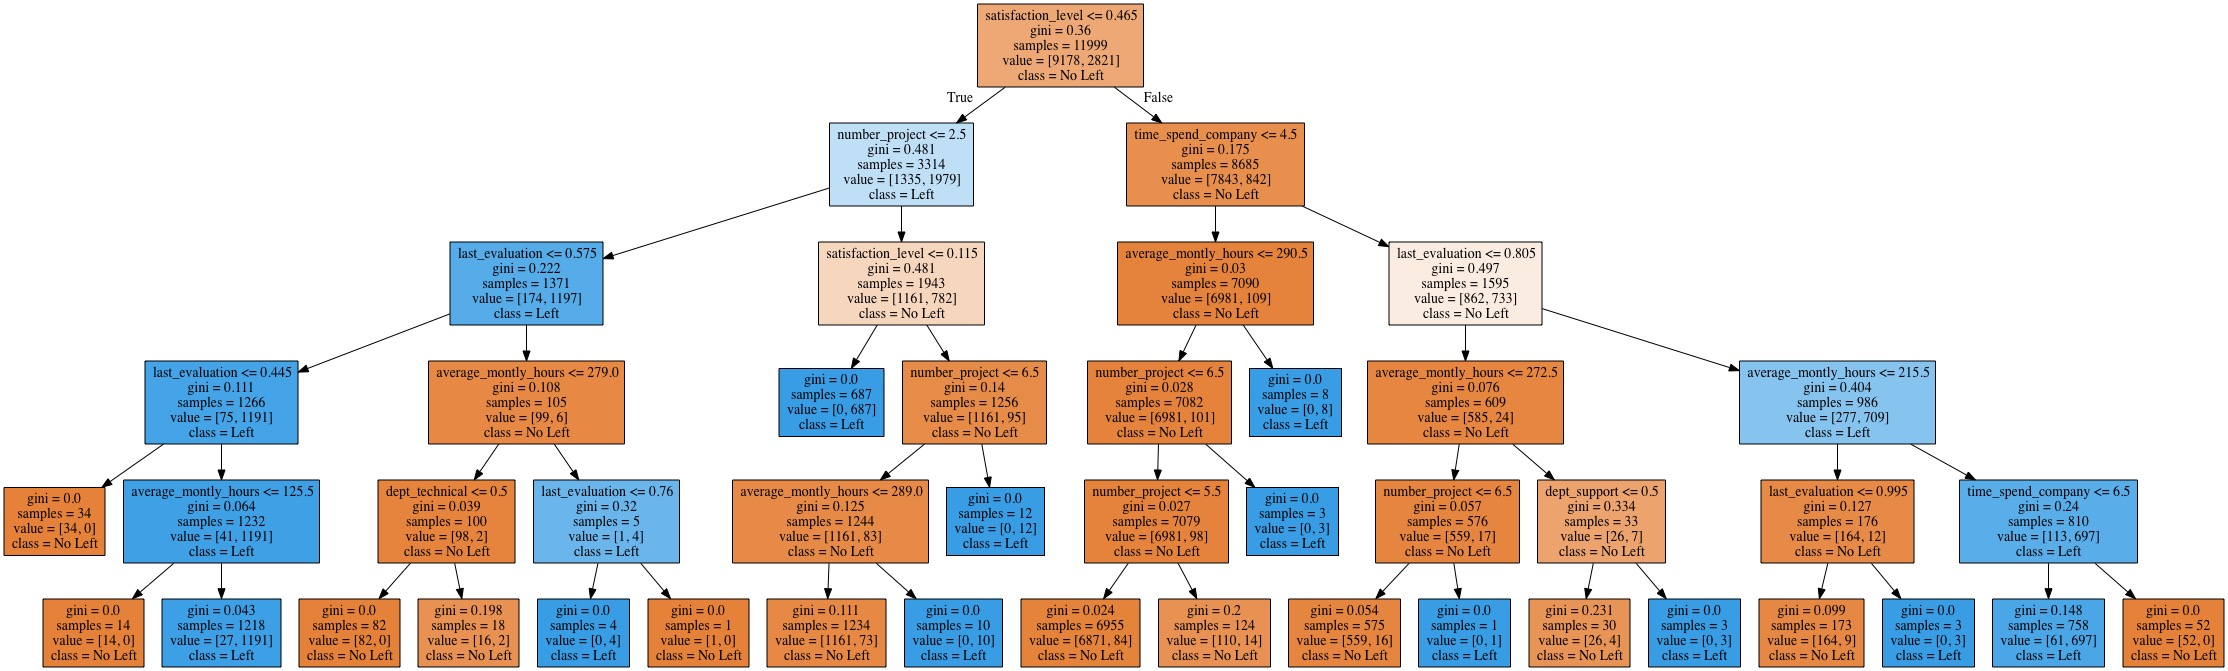

In [132]:
tree_graph.write_jpeg( "tree.jpeg" )

from IPython import display

display.Image( "tree.jpeg" )

In [135]:
from sklearn.tree import plot_tree

In [136]:
plot_tree?

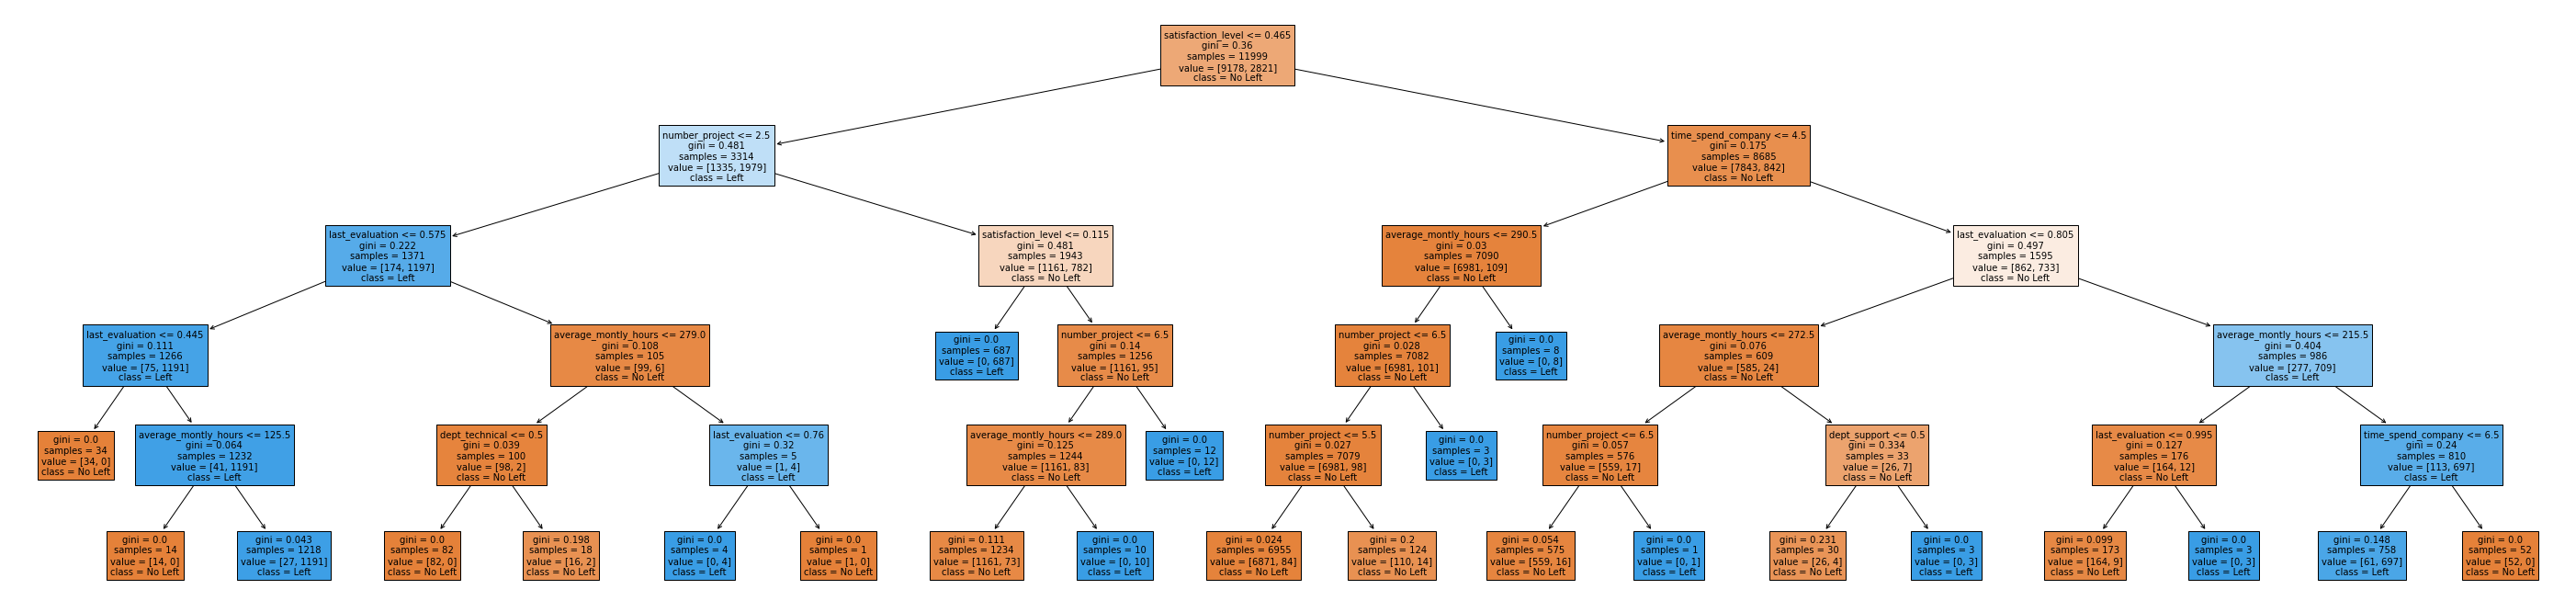

In [137]:
plt.figure(figsize = (50, 12))
plot_tree(tree_v2,
          feature_names = X_features,
          class_names = ['No Left', 'Left'],
          filled = True,
          fontsize = 10);
plt.savefig('tree.png')

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = { "max_depth": range(3,10),
           "criterion": ['gini', 'entropy']}

In [ ]:
grid_v3 = GridSearchCV( DecisionTreeClassifier(),
                        param_grid = params,
                        cv = 10,
                        scoring = 'recall')

In [ ]:
grid_v3.fit( X_train, y_train )

In [ ]:
grid_v3.best_params_

In [ ]:
grid_v3.best_score_

In [ ]:
best_model = grid_v3.best_estimator_

In [ ]:
grid_v3.cv_results_

### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_v1 = RandomForestClassifier(n_estimators = 100,
                               max_depth = 10,
                               max_features = 0.2,
                               max_samples = 0.4,
                               criterion = 'gini')

In [ ]:
rf_v1.fit(X_train, y_train)

In [ ]:
rf_pred_v1 = rf_v1.predict(X_test)

In [ ]:
cm_rf = confusion_matrix( y_test, rf_pred_v1, [1,0])

In [ ]:
sn.heatmap( cm_rf, 
            annot = True,
            fmt = "0.0f",
            xticklabels = ['Left', 'No Left'],
            yticklabels = ['Left', 'No Left'] );

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix");

In [ ]:
print(classification_report(y_test, rf_pred_v1))

In [ ]:
rf_v2 = RandomForestClassifier()

In [ ]:
params = { 'n_estimators': [50, 100, 200],
           'max_depth': [5, 10],
           'max_features': [0.2, 0.4],
           'max_samples': [0.4, 0.6],
           'criterion': ['gini', 'entropy'] }

In [ ]:
rf_grid = GridSearchCV(rf_v2,
                       param_grid=params,
                       cv = 10,
                       scoring = 'f1')

In [ ]:
rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
rf_grid.best_estimator_

In [ ]:
features_df = pd.DataFrame( { "features": X_features,
                              "importance": rf_grid.best_estimator_.feature_importances_ } )

In [ ]:
features_df = features_df.sort_values('importance', ascending=False)

In [ ]:
features_df['cumsum'] = features_df.importance.cumsum()

In [ ]:
features_df

### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier( n_neighbors = 10, weights = 'distance' )

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
params = { "n_neighbors": [5, 10, 15, 20],
           "weights" : ['uniform', 'distance']}

In [ ]:
knn_grid = GridSearchCV( KNeighborsClassifier(),
                         param_grid = params,
                         cv = 10,
                         scoring = 'recall')

In [ ]:
knn_grid.fit(X_train, y_train)

In [ ]:
knn_grid.best_params_

In [ ]:
knn_grid.best_score_

In [ ]:
knn_grid.best_estimator_